<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/CeasarianV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('white')

url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/Caesarian%20Section%20Classification%20Dataset(CSV).csv'

In [112]:
data = pd.read_csv(url)

data.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


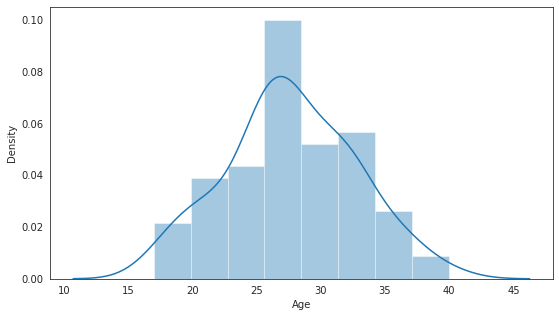

In [113]:
plt.figure(figsize=(9,5))

sns.distplot(data.Age)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


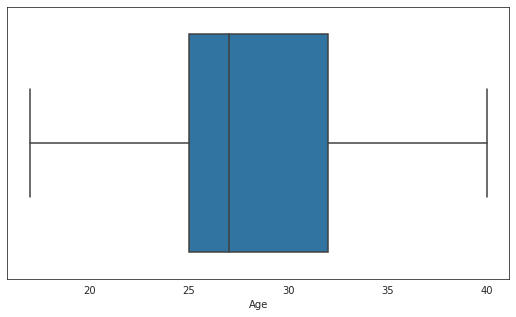

In [114]:
plt.figure(figsize=(9,5))

sns.boxplot(data.Age)
plt.show()

In [115]:
data.Caesarian = [i.lower() for i in data.Caesarian]

In [116]:
data.Caesarian

0      no
1     yes
2      no
3      no
4     yes
     ... 
75     no
76    yes
77    yes
78    yes
79     no
Name: Caesarian, Length: 80, dtype: object

In [117]:
print(data.info())
print('-'*100)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB
None
----------------------------------------------------------------------------------------------------
             Age  Delivey No
count  80.000000   80.000000
mean   27.687500    1.662500
std     5.017927    0.794662
min    17.000000    1.000000
25%    25.000000    1.000000
50%    27.000000    1.000000
75%    32.000000    2.000000
max    40.000000    4.000000


In [118]:
data['Delivey No'].unique(), data['Delivery No'].unique()

(array([1, 2, 3, 4]),
 array(['Timely', 'Premature', 'Latecomer'], dtype=object))

In [119]:
data['Delivey No'].value_counts()

1    41
2    27
3    10
4     2
Name: Delivey No, dtype: int64

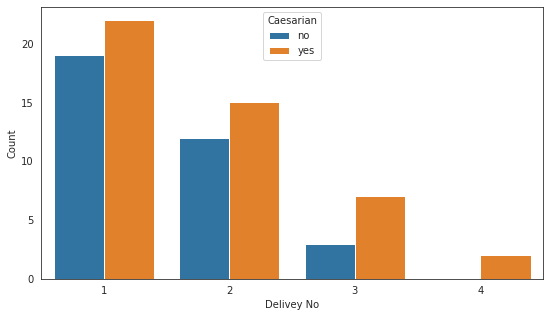

In [120]:
delivey_group = data.groupby(['Delivey No', 'Caesarian']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Delivey No', y='Count', hue='Caesarian', data=delivey_group)
plt.show()

In [121]:
data['Delivery No'].value_counts()

Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64

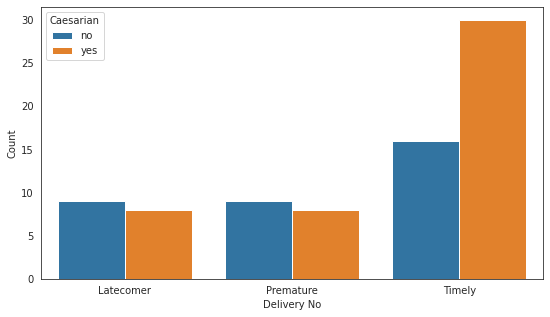

In [122]:
delivery_group = data.groupby(['Caesarian', 'Delivery No']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Delivery No', y='Count', hue='Caesarian', data=delivery_group)
plt.show()

In [123]:
data['Blood of Pressure'] = [i.lower() for i in data['Blood of Pressure']]

In [124]:
data['Blood of Pressure'].value_counts()

normal    40
low       20
high      20
Name: Blood of Pressure, dtype: int64

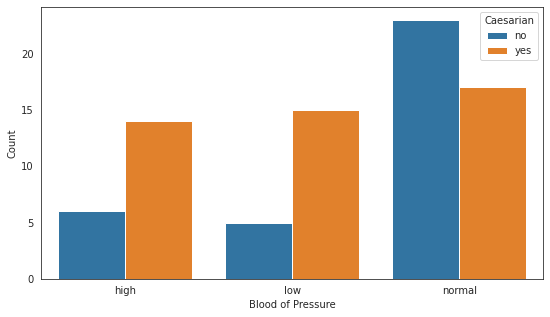

In [125]:
blood_group = data.groupby(['Blood of Pressure', 'Caesarian']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Blood of Pressure', y='Count', hue='Caesarian', data=blood_group)
plt.show()

In [126]:
data['Heart Problem'].value_counts()

apt      50
inept    30
Name: Heart Problem, dtype: int64

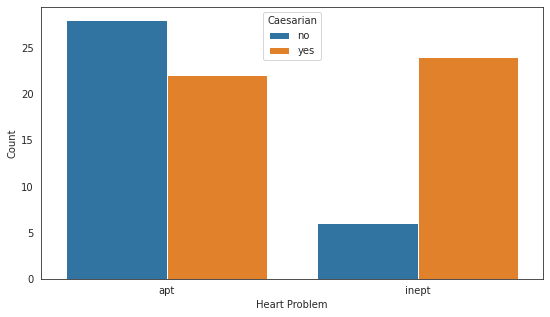

In [127]:
heart_group = data.groupby(['Heart Problem', 'Caesarian']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Heart Problem', y='Count', hue='Caesarian', data=heart_group)
plt.show()

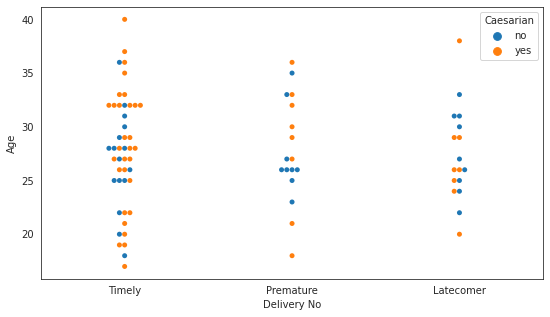

In [128]:
plt.figure(figsize=(9,5))

sns.swarmplot(x='Delivery No', y='Age', hue='Caesarian', data=data)
plt.show()

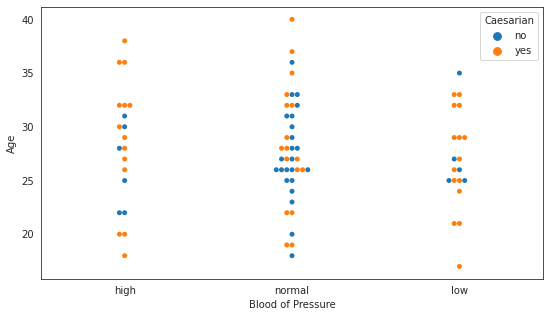

In [129]:
plt.figure(figsize=(9,5))

sns.swarmplot(x='Blood of Pressure', y='Age', hue='Caesarian', data=data)
plt.show()

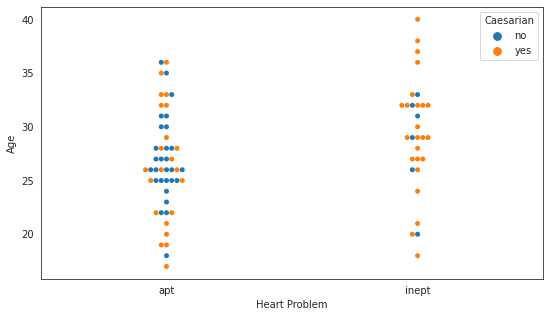

In [130]:

plt.figure(figsize=(9,5))

sns.swarmplot(x='Heart Problem', y='Age', hue='Caesarian', data=data)
plt.show()

In [131]:
data.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,high,apt,no
1,26,2,Timely,normal,apt,yes
2,26,2,Premature,normal,apt,no
3,28,1,Timely,high,apt,no
4,22,2,Timely,normal,apt,yes


In [132]:
data.drop('Delivey No', axis=1, inplace=True)

In [133]:
data['Blood of Pressure'].replace('low', 0, inplace=True)
data['Blood of Pressure'].replace('normal', 1, inplace=True)
data['Blood of Pressure'].replace('high', 2, inplace=True)

In [134]:
heart = pd.get_dummies(data['Heart Problem'], dtype='int8')
data['Caesarian'].replace('yes',1, inplace=True)
data['Caesarian'].replace('no',0, inplace=True)
delivery = pd.get_dummies(data['Delivery No'], dtype='int8')

In [135]:
data.drop('Heart Problem', axis=1, inplace=True)
data.drop('Delivery No', axis=1, inplace=True)

In [136]:
frame = [data, heart, delivery]

dta = pd.concat(frame, axis=1)

dta.head()

,Age,Blood of Pressure,Caesarian,apt,inept,Latecomer,Premature,Timely
0,22,2,0,1,0,0,0,1
1,26,1,1,1,0,0,0,1
2,26,1,0,1,0,0,1,0
3,28,2,0,1,0,0,0,1
4,22,1,1,1,0,0,0,1


In [137]:
dta.columns = ['Age', 'BloodPressure', 'Caesarian', 'YesHeartP', 'NoHeartP', 'BirthLC', 'BirthP', 'BirthT']

In [138]:
dta.head()

,Age,BloodPressure,Caesarian,YesHeartP,NoHeartP,BirthLC,BirthP,BirthT
0,22,2,0,1,0,0,0,1
1,26,1,1,1,0,0,0,1
2,26,1,0,1,0,0,1,0
3,28,2,0,1,0,0,0,1
4,22,1,1,1,0,0,0,1


In [139]:
dta['Age'] = dta['Age'].astype('int16')

dta['BloodPressure'] = dta['BloodPressure'].astype('int8')
dta['Caesarian'] = dta['Caesarian'].astype('int8')


In [140]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            80 non-null     int16
 1   BloodPressure  80 non-null     int8 
 2   Caesarian      80 non-null     int8 
 3   YesHeartP      80 non-null     int8 
 4   NoHeartP       80 non-null     int8 
 5   BirthLC        80 non-null     int8 
 6   BirthP         80 non-null     int8 
 7   BirthT         80 non-null     int8 
dtypes: int16(1), int8(7)
memory usage: 848.0 bytes


In [141]:
y = dta.Caesarian

X = dta.drop('Caesarian', axis=1)

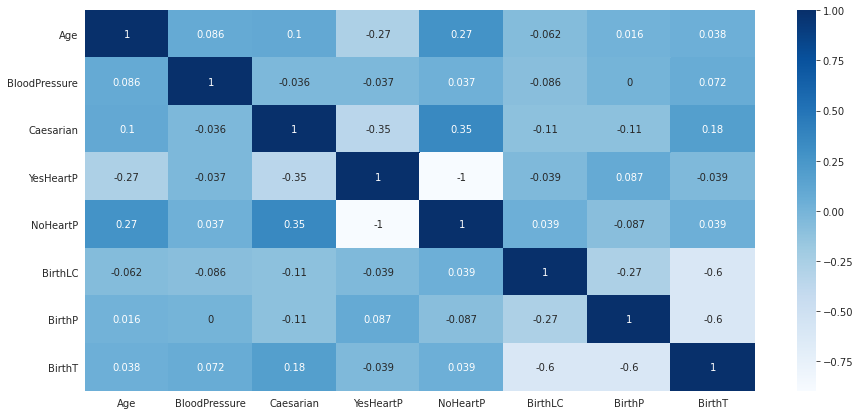

In [142]:
plt.figure(figsize=(15,7))

sns.heatmap(dta.corr(method='spearman'), annot=True, cmap='Blues', robust=True)
plt.show()

In [150]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='minority')

X_res, y_res = smote.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [175]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_res, y_res, random_state=8, test_size=0.4)

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [176]:
param = {'n_estimators':[100,300,500,700,1000], 'criterion':['gini', 'entropy'],
         'max_depth':[3,5,7,9], 'class_weight':['balanced', 'balanced_subsamples'],
         'max_leaf_nodes':[2,3,5]}

rfc = RandomForestClassifier()

grid = GridSearchCV(rfc, param, scoring='accuracy')

grid.fit(X_trainR, y_trainR)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "balanced_subsamples".

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "balanced_subsamples".

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [178]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'n_estimators': 100}

In [181]:
grid.best_score_

0.7272727272727273

In [182]:
from sklearn.metrics import accuracy_score

In [188]:
estimators = [10,20,30,40,50,60,70,80,90,100]

train = []
test = []

for i in estimators:

  rf = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=3, max_leaf_nodes=5, random_state=3)
  rf.fit(X_trainR, y_trainR)

  pred_test = rf.predict(X_testR)
  pred_train = rf.predict(X_trainR)

  test.append(accuracy_score(y_testR, pred_test))
  train.append(accuracy_score(y_trainR, pred_train))

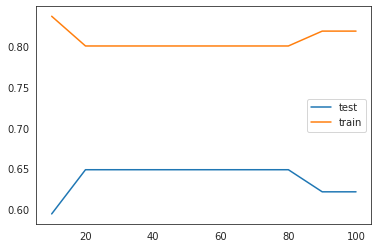

In [189]:
sns.lineplot(x=estimators, y=test, label='test')
sns.lineplot(x=estimators, y=train, label='train')
plt.show()

In [174]:
from sklearn.

23